In [1]:
from electronsandstuff.pmd_beamphysics.beam_diff import (
    plot_marginal,
    plot_density_contour,
)
from pmd_beamphysics import ParticleGroup

In [2]:
pg1 = ParticleGroup("data/bmad_particles.h5")
pg2 = ParticleGroup("data/bmad_particles2.h5")

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='x', ylabel='Normalized Count'>)

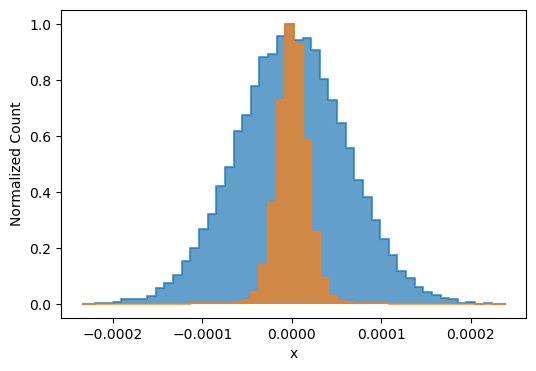

In [3]:
plot_marginal([pg1, pg2], "x")

(<Figure size 600x500 with 1 Axes>, <Axes: xlabel='x', ylabel='px'>)

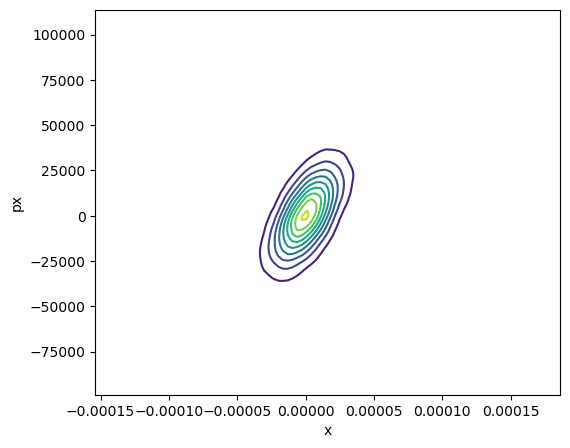

In [4]:
plot_density_contour(pg2, "x", "px")